## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
data1 = data.split('\n')
print(len(data1))
dn = []
dv = []

for i in range(len(data1)-1) :
    data2 = data1[i].split('\t')
    dn.append(data2[0])
    dv.append(data2[1])

dv[3]

9996


'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'

## 將 txt 轉成 pandas dataframe

In [4]:
import pandas as pd
  
df = pd.DataFrame(dv)

print(df.iloc[2][0])
print(df.loc[2:3][0][2])
df[0:10][0].values

http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg


array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
       'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
       'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
       'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
       'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
       'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
       'http://www.porschemania.it/discus/messages/815/102099.jpg',
       'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg'],
      dtype=object)

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

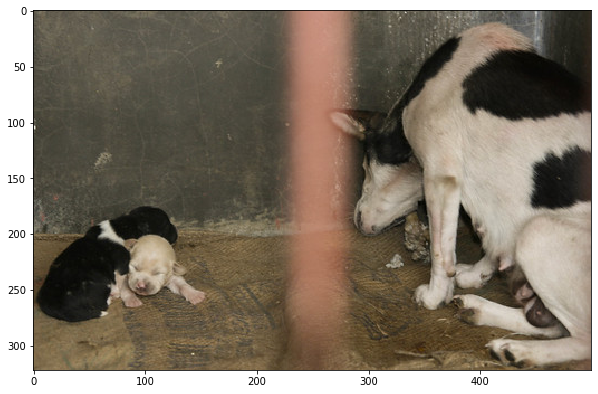

(322, 500, 3)


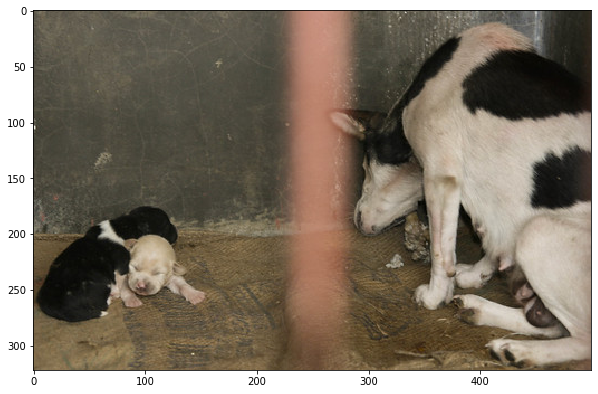

In [6]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

first_link = df.loc[1:1][0][1]
 
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))
plt.figure(figsize=(10,10))

plt.imshow(img)
plt.show()
# Convert img to numpy array

from PIL import Image
#img2 = Image.open('data/example.jpg') # 這時候還是 PIL object
img2 = np.array(img)
plt.figure(figsize=(10,10))
print(img2.shape)
plt.imshow(img2)
plt.show()

In [20]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    res = []
   
    for link in url_list :
       try:
            response = requests.get(link)
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((1024,1024)) # 假如 resize, 就先統一到 256 x 256
                img = np.array(img)
       except Exception as e :
            print(e)
               
       else:
            res.append(img)
     
    
    
    return res

cannot identify image file <_io.BytesIO object at 0x00000260D991CF68>
cannot identify image file <_io.BytesIO object at 0x00000260D991CF68>
cannot identify image file <_io.BytesIO object at 0x00000260DBDF2F10>
cannot identify image file <_io.BytesIO object at 0x00000260D991CF68>
cannot identify image file <_io.BytesIO object at 0x00000260D991CF68>
Total images that we got: 5 
(1024, 1024, 3)


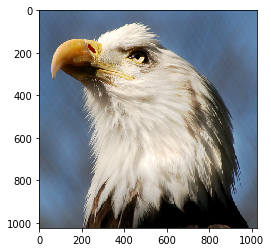

(1024, 1024, 3)


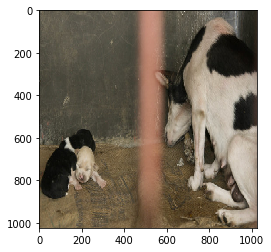

(1024, 1024, 3)


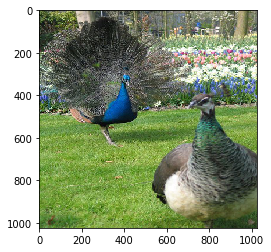

(1024, 1024, 3)


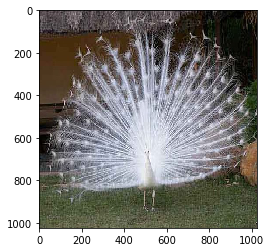

(1024, 1024, 3)


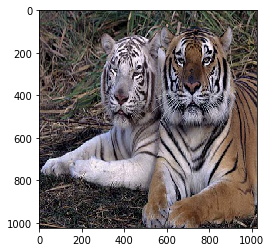

In [22]:
result = img2arr_fromURLs(df[0:10][0].values, resize = True)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    print(im_get.shape)
    plt.imshow(im_get)
    plt.show()